<a href="https://colab.research.google.com/github/muhammetsnts/SPARK/blob/main/3.Spark_Streaming/1.Spark_Streaming_Documentation_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spark Streaming Overview
Spark Streaming is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams. Data can be ingested from many sources like Kafka, Kinesis, or TCP sockets, and can be processed using complex algorithms expressed with high-level functions like map, reduce, join and window. Finally, processed data can be pushed out to filesystems, databases, and live dashboards. In fact, you can apply Spark’s machine learning and graph processing algorithms on data streams.

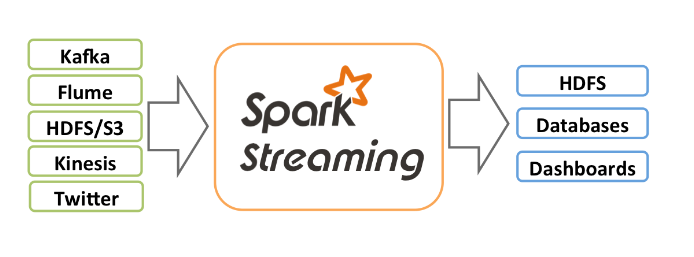

Internally, it works as follows. Spark Streaming receives live input data streams and divides the data into batches, which are then processed by the Spark engine to generate the final stream of results in batches.

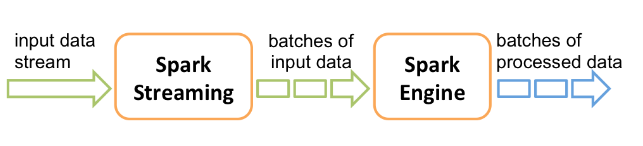

Spark Streaming provides a high-level abstraction called discretized stream or DStream, which represents a continuous stream of data. DStreams can be created either from input data streams from sources such as Kafka, and Kinesis, or by applying high-level operations on other DStreams. Internally, a DStream is represented as a sequence of RDDs.

This guide shows you how to start writing Spark Streaming programs with DStreams. You can write Spark Streaming programs in Scala, Java or Python (introduced in Spark 1.2), all of which are presented in this guide. You will find tabs throughout this guide that let you choose between code snippets of different languages.

Note: There are a few APIs that are either different or not available in Python. Throughout this guide, you will find the tag Python API highlighting these differences.

## Spark Streaming Example

In [3]:
# install Java8
!apt-get -q install openjdk-8-jdk-headless -qq > /dev/null

# download spark3.1.1
!wget -q https://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz

# unzip it
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

# install findspark 
!pip install -q findspark


import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [4]:
import findspark
findspark.init("/content/spark-3.1.1-bin-hadoop2.7")

First, we import StreamingContext, which is the main entry point for all streaming functionality. We create a local StreamingContext with two execution threads, and batch interval of 1 second.

In [5]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext

In [6]:
# Create a local StreamingContext with two working thread and batch interval of 1 second

sc = SparkContext('local[2]', 'NetworkWordCount')
ssc = StreamingContext(sc,1)

Using this context, we can create a DStream that represents streaming data from a TCP source, specified as hostname (e.g. localhost) and port (e.g. 9999).

In [9]:
# Create a DStream that will connect to hostname:port, like localhost:9999

lines = ssc.socketTextStream("localhost", 9999)

This lines DStream represents the stream of data that will be received from the data server. Each record in this DStream is a line of text. Next, we want to split the lines by space into words.

In [10]:
# Split each line into words

words = lines.flatMap(lambda line : line.split(' '))

flatMap is a one-to-many DStream operation that creates a new DStream by generating multiple new records from each record in the source DStream. In this case, each line will be split into multiple words and the stream of words is represented as the words DStream. Next, we want to count these words.

In [11]:
# Count each word in each batch

pairs = words.map(lambda word : (word,1))

In [12]:
word_counts = pairs.reduceByKey(lambda num1, num2 : num1 + num2)

In [14]:
# Print the first ten elements of each RDD generated in this DStream to the console

word_counts.pprint()

The words DStream is further mapped (one-to-one transformation) to a DStream of (word, 1) pairs, which is then reduced to get the frequency of words in each batch of data. Finally, wordCounts.pprint() will print a few of the counts generated every second.

Note that when these lines are executed, Spark Streaming only sets up the computation it will perform when it is started, and no real processing has started yet. To start the processing after all the transformations have been setup, we finally call

In [ ]:
ssc.start()             # Start the computation
ssc.awaitTermination()  # Wait for the computation to terminate

`$ nc -lk 9999`

**Then, in a different terminal, you can start the example by using.**

```
# TERMINAL 1:
# Running Netcat

$ nc -lk 9999

hello world
```

**Output:**

```
...
-------------------------------------------
Time: 2021-09-27 09:25:21
-------------------------------------------
(hello,1)
(world,1)
...
```